In [2]:
import pomegranate as pg

In [3]:
fg=pg.FactorGraph(name='test')

In [4]:
x0 = pg.DiscreteDistribution({0: 0.5, 1: 0.5})
x1 = pg.DiscreteDistribution({0: 0.5, 1: 0.5})
x2 = pg.DiscreteDistribution({0: 0.5, 1: 0.5})
x3 = pg.DiscreteDistribution({0: 0.5, 1: 0.5})

In [5]:
f0 = pg.DiscreteDistribution({0: 0.3, 1: 0.7})
f1 = pg.JointProbabilityTable(
    [[0, 0, 0.2], [0, 1, 0.8], [1, 0, 0.7], [1, 1, 0.3]],
    [x0,x1])
f2 = pg.JointProbabilityTable(
    [[0, 0, 0.4], [0, 1, 0.6], [1, 0, 0.3], [1, 1, 0.7]],
    [x0,x2])
f3 = pg.JointProbabilityTable(
    [[0, 0,0, 0.2], [0,0, 1, 0.8], [0,1, 0, 0.3], [0,1, 1, 0.7],[1,0,0, 0.6],[1,0, 1, 0.4],[1,1, 0, 0.7],[1,1, 1, 0.3]],
    [x1,x2,x3])

In [6]:
s0 = pg.Node(x0, name="x0")
s1 = pg.Node(f0, name="x0-joint")

s2 = pg.Node(x1, name="x1")
s3 = pg.Node(f1, name="x1-joint")

s4 = pg.Node(x2, name="x2")
s5 = pg.Node(f2, name="x2-joint")

s6 = pg.Node(x3, name="x3")
s7 = pg.Node(f3, name="x3-joint")

In [7]:
fg.add_states(s0,s1,s2,s3,s4,s5,s6,s7)

In [8]:
fg.add_edge(s0,s1)
fg.add_edge(s2,s3)
fg.add_edge(s4,s5)
fg.add_edge(s6,s7)
fg.add_edge(s0,s3)
fg.add_edge(s0,s5)
fg.add_edge(s4,s7)
fg.add_edge(s2,s7)

In [9]:
fg.bake()

In [ ]:
#Note:x0-joint , x1-joint are the factors f0,f1

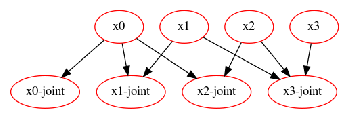

In [10]:
fg.plot()

In [14]:
print("\n".join( "{:10.10} : {}".format( state.name, belief.parameters[0] ) for state, belief in zip( fg.states, fg.predict_proba({}, max_iterations=100) ) ))

x0         : {0: 0.3000000000000003, 1: 0.6999999999999996}
x0-joint   : {0: 0.5499999999999997, 1: 0.4500000000000003}
x1         : {0: 0.33000000000000024, 1: 0.6699999999999999}
x1-joint   : {0: 0.4470000000000001, 1: 0.5529999999999999}
